In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Dataset/online_retail_II.csv')

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [7]:
df.shape

(1067371, 8)

In [8]:
df.dropna(subset=['Description'], inplace=True)  ## Dropping rows with null Description

In [9]:
# Step 1: Fill nulls with label "GUEST"
df['Customer ID'] = df['Customer ID'].fillna('GUEST')

# Step 2: Convert to string (so that numeric IDs don't look like floats)
df['Customer ID'] = df['Customer ID'].astype(str)

# Step 3: Convert to categorical (saves memory & makes sense semantically)
df['Customer ID'] = df['Customer ID'].astype('category')

In [10]:
# Converting Invoice to categorical
df['Invoice'] = df['Invoice'].astype('category') 

In [11]:
# Converting InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [13]:
count_invalid_quantity = len(df[df['Quantity'] <= 0])
print(f'Number of rows with invalid Quantity: {count_invalid_quantity}')

Number of rows with invalid Quantity: 20261


In [14]:
df = df[df['Quantity']
    > 0]  # Keep only rows with positive Quantity

In [15]:
count_invalid_price = len(df[df['Price'] <= 0])
print(f'Number of rows with invalid Price: {count_invalid_price}')

Number of rows with invalid Price: 1057


In [16]:
df = df[df['Price'] > 0]  # Keep only rows with positive Price

In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,1041671.0,10.963448,1.0,1.0,3.0,10.0,80995.0,126.51493
InvoiceDate,1041671,2011-01-03 16:31:26.403269376,2009-12-01 07:45:00,2010-07-12 10:26:00,2010-12-07 15:33:00,2011-07-24 12:05:00,2011-12-09 12:50:00,NaN
Price,1041671.0,4.077038,0.001,1.25,2.1,4.13,25111.09,51.448979


In [18]:
min_price = df['Price'].min()
print(f"The minimum price is: {min_price}")

The minimum price is: 0.001


In [19]:
outlier_quantity = len(df[df['Quantity'] > 10])
print(f'Number of rows with Quantity > 10: {outlier_quantity}')

Number of rows with Quantity > 10: 259951


In [20]:


# Create a copy of your DataFrame to store the cleaned data
df_cleaned = df.copy()

# --- Remove Outliers from 'Quantity' ---
Q1_quantity = df_cleaned['Quantity'].quantile(0.25)
Q3_quantity = df_cleaned['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

df_cleaned = df_cleaned[df_cleaned['Quantity'] <= upper_bound_quantity]


# --- Remove Outliers from 'Price' ---
Q1_price = df_cleaned['Price'].quantile(0.25)
Q3_price = df_cleaned['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
upper_bound_price = Q3_price + 1.5 * IQR_price

df_cleaned = df_cleaned[df_cleaned['Price'] <= upper_bound_price]


# Display the shape of the DataFrame to see the effect of the cleaning
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (1041671, 8)
Cleaned DataFrame shape: (866736, 8)


In [21]:
df_cleaned.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,866736.0,4.876884,1.0,1.0,3.0,8.0,23.0,4.460413
InvoiceDate,866736,2011-01-04 20:44:41.913108480,2009-12-01 07:45:00,2010-07-13 12:33:00,2010-12-07 18:36:00,2011-07-25 16:57:00,2011-12-09 12:50:00,NaN
Price,866736.0,2.82503,0.001,1.25,2.1,3.75,8.7,2.040362


## Feature Engineering


In [22]:
## Creating a new column 'Sales' = 'Quantity' * 'Price'
df_cleaned['Sales'] = df_cleaned['Quantity'] * df_cleaned['Price']
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6


In [23]:
# Extract the Year, Month, Weekday, and Hour into new columns
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Weekday'] = df_cleaned['InvoiceDate'].dt.day_name()
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Year,Month,Weekday,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,Tuesday,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,Tuesday,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,Tuesday,7
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5,2009,12,Tuesday,7
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6,2009,12,Tuesday,7


In [24]:
df_cleaned['Customer ID'].value_counts()

Customer ID
GUEST      205179
17841.0     12166
14911.0      8252
12748.0      6596
14606.0      6210
            ...  
16377.0         0
12487.0         0
12466.0         0
18251.0         0
14603.0         0
Name: count, Length: 5943, dtype: int64

In [25]:
df_cleaned['Customer_Type'] = np.where(df_cleaned['Customer ID'] == 'GUEST', 'unidentified', 'identified')
df_cleaned['Customer_Type'].value_counts()

Customer_Type
identified      661557
unidentified    205179
Name: count, dtype: int64

In [26]:
df_cleaned['Customer_Region'] = np.where(df_cleaned['Country'] == 'United Kingdom', 'Domestic', 'International')
df_cleaned['Customer_Region'].value_counts()


Customer_Region
Domestic         808593
International     58143
Name: count, dtype: int64

In [27]:
df_cleaned['IsCancelled'] = np.where(df_cleaned['Invoice'].astype(str).str.startswith('C'), 1, 0)
df_cleaned['IsCancelled'].value_counts()

IsCancelled
0    866736
Name: count, dtype: int64

## “In this dataset, cancellations are negligible (only 1 row), so cancellation-related analysis was skipped.”

In [28]:
# Check the total count of invoices starting with 'C' in the original df
print(f"Total invoices starting with 'C' in the original DataFrame: {df['Invoice'].astype(str).str.startswith('C').sum()}")

# Display a few examples of these invoices
print("\nExample of invoices starting with 'C':")
print(df[df['Invoice'].astype(str).str.startswith('C')].head())

Total invoices starting with 'C' in the original DataFrame: 1

Example of invoices starting with 'C':
       Invoice StockCode Description  Quantity         InvoiceDate   Price  \
76799  C496350         M      Manual         1 2010-02-01 08:24:00  373.57   

      Customer ID         Country  
76799       GUEST  United Kingdom  


In [29]:
df_cleaned = df_cleaned.drop(columns=['IsCancelled'])
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Year,Month,Weekday,Hour,Customer_Type,Customer_Region
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,Tuesday,7,identified,Domestic
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,Tuesday,7,identified,Domestic
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,Tuesday,7,identified,Domestic
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5,2009,12,Tuesday,7,identified,Domestic
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6,2009,12,Tuesday,7,identified,Domestic


# Creating column named Basket size by grouping invoice and stockid. then removing its outliers...all this to categorize it in BULK AND SMALL order

In [30]:
# Step 1: Recalculate the number of unique items per invoice
Basket_size_per_invoice = df_cleaned.groupby('Invoice')['StockCode'].nunique()

# Step 2: Remove the outliers from this grouped data using IQR
Q1 = Basket_size_per_invoice.quantile(0.25)
Q3 = Basket_size_per_invoice.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

Basket_size_per_invoice_cleaned = Basket_size_per_invoice[Basket_size_per_invoice <= upper_bound]

C:\Users\msi\AppData\Local\Temp\ipykernel_20720\2214028659.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Basket_size_per_invoice = df_cleaned.groupby('Invoice')['StockCode'].nunique()


In [31]:
# Display the descriptive stats of the cleaned data to see the effect
print("Descriptive stats of cleaned basket sizes:")
print(Basket_size_per_invoice_cleaned.describe())

Descriptive stats of cleaned basket sizes:
count    46176.000000
mean        10.415302
std         12.072415
min          0.000000
25%          0.000000
50%          6.000000
75%         17.000000
max         50.000000
Name: StockCode, dtype: float64


In [32]:
# Step 3: Map the cleaned basket size back to the main DataFrame
df_cleaned['Unique_Items_Per_Invoice'] = df_cleaned['Invoice'].map(Basket_size_per_invoice_cleaned)

# Step 4: Create the 'Basket_Size' column with the median of the cleaned data (e.g., 6) as the threshold
# You can get the new median from the descriptive stats output
median_cleaned = Basket_size_per_invoice_cleaned.median()
df_cleaned['Basket_Size'] = np.where(df_cleaned['Unique_Items_Per_Invoice'] > median_cleaned, 'bulk', 'small')


In [33]:
# Check the final value counts
print("\nFinal Basket Size distribution:")
print(df_cleaned['Basket_Size'].value_counts())


Final Basket Size distribution:
Basket_Size
bulk     470314
small    396422
Name: count, dtype: int64


In [34]:
df_cleaned.dtypes

Invoice                           category
StockCode                           object
Description                         object
Quantity                             int64
InvoiceDate                 datetime64[ns]
Price                              float64
Customer ID                       category
Country                             object
Sales                              float64
Year                                 int32
Month                                int32
Weekday                             object
Hour                                 int32
Customer_Type                       object
Customer_Region                     object
Unique_Items_Per_Invoice           float64
Basket_Size                         object
dtype: object

In [35]:
df_cleaned['Invoice'].nunique(), df_cleaned['Customer ID'].nunique(), df_cleaned['StockCode'].nunique()

(35738, 5652, 4587)

In [36]:
df_cleaned[['StockCode', 'Description']].value_counts().head(10)

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    4587
85099B     JUMBO BAG RED RETROSPOT               2852
20727      LUNCH BAG  BLACK SKULL.               2351
47566      PARTY BUNTING                         2242
21931      JUMBO STORAGE BAG SUKI                2213
21034      REX CASH+CARRY JUMBO SHOPPER          2187
22411      JUMBO SHOPPER VINTAGE RED PAISLEY     2112
22382      LUNCH BAG SPACEBOY DESIGN             2107
84879      ASSORTED COLOUR BIRD ORNAMENT         2093
20728      LUNCH BAG CARS BLUE                   2032
Name: count, dtype: int64

In [37]:
df_cleaned['Country'].value_counts()

Country
United Kingdom          808593
Germany                  12537
EIRE                     12278
France                   10473
Spain                     2823
Belgium                   2337
Switzerland               2142
Portugal                  2044
Netherlands               1638
Italy                     1167
Channel Islands           1117
Cyprus                     960
Australia                  867
Norway                     861
Finland                    760
Austria                    714
Sweden                     638
Unspecified                591
Greece                     513
Poland                     408
Denmark                    394
United Arab Emirates       325
USA                        297
Malta                      241
Israel                     239
Hong Kong                  223
Singapore                  213
Iceland                    198
Japan                      196
Canada                     173
Lithuania                  142
RSA                        141


In [38]:
df_cleaned['Total_Price'] = df_cleaned['Quantity'] * df_cleaned['Price']
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Year,Month,Weekday,Hour,Customer_Type,Customer_Region,Unique_Items_Per_Invoice,Basket_Size,Total_Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,Tuesday,7,identified,Domestic,4.0,small,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,Tuesday,7,identified,Domestic,4.0,small,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,Tuesday,7,identified,Domestic,4.0,small,81.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5,2009,12,Tuesday,7,identified,Domestic,4.0,small,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6,2009,12,Tuesday,7,identified,Domestic,3.0,small,30.6


In [39]:
# Calculate Q1 and Q3 for 'Total_Price'
Q1_sales = df_cleaned['Total_Price'].quantile(0.25)
Q3_sales = df_cleaned['Total_Price'].quantile(0.75)

# Calculate the IQR
IQR_sales = Q3_sales - Q1_sales

# Define the upper bound for outliers
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Filter the DataFrame to keep only the values within the upper bound
df_cleaned_sales = df_cleaned[df_cleaned['Total_Price'] <= upper_bound_sales]

# Display the new descriptive statistics to see the effect
print(df_cleaned_sales['Total_Price'].describe())

count    831032.000000
mean          9.271890
std           7.329665
min           0.001000
25%           3.290000
50%           6.950000
75%          15.000000
max          33.300000
Name: Total_Price, dtype: float64


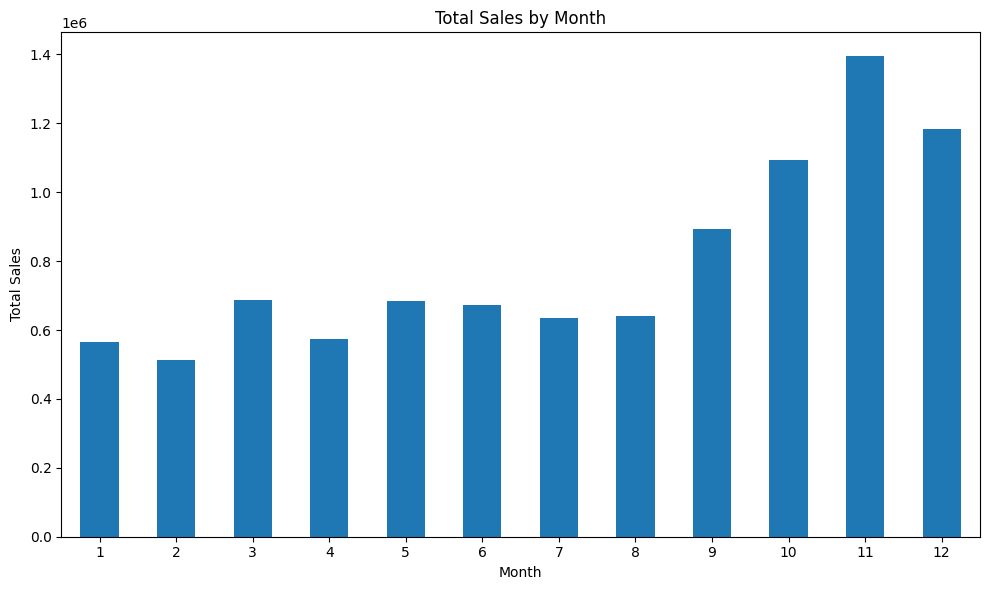

In [40]:
# --- 1. Sales by Month ---
# Group by Month and sum the Sales
sales_by_month = df_cleaned.groupby('Month')['Sales'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

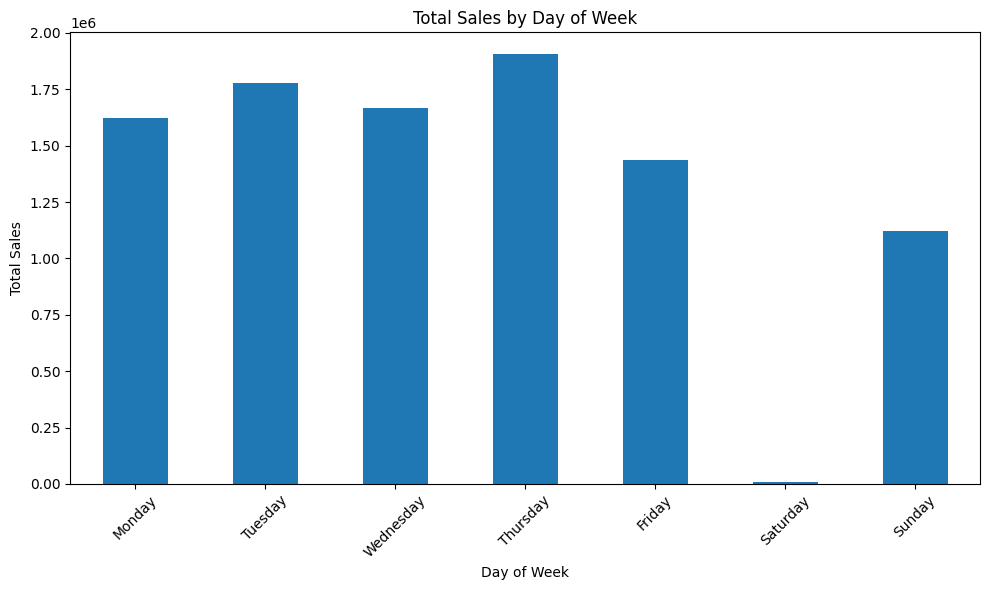

In [41]:
# --- 2. Sales by Day of Week ---
# Group by Weekday and sum the Sales
sales_by_weekday = df_cleaned.groupby('Weekday')['Sales'].sum()

# Sort the days in a logical order (Mon-Sun)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_weekday = sales_by_weekday.reindex(day_order)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sales_by_weekday.plot(kind='bar')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

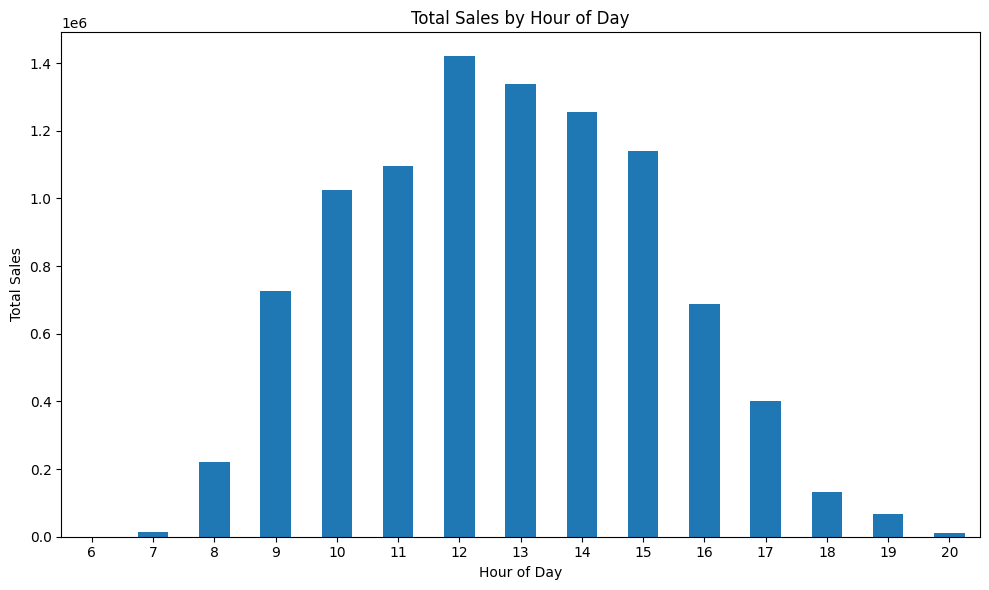

In [42]:
# --- 3. Sales by Hour of Day ---
# Group by Hour and sum the Sales
sales_by_hour = df_cleaned.groupby('Hour')['Sales'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='bar')
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Insights

1. Sales is at highers section at the end of the year ie sept, oct, nov, december
2. Sales is lower on weekends i.e saturday and sunday
3. Sales is usuall higher from 10am to 3pm.

## Bivariate Analysis

Correlation coefficient between Price and Quantity: -0.3048


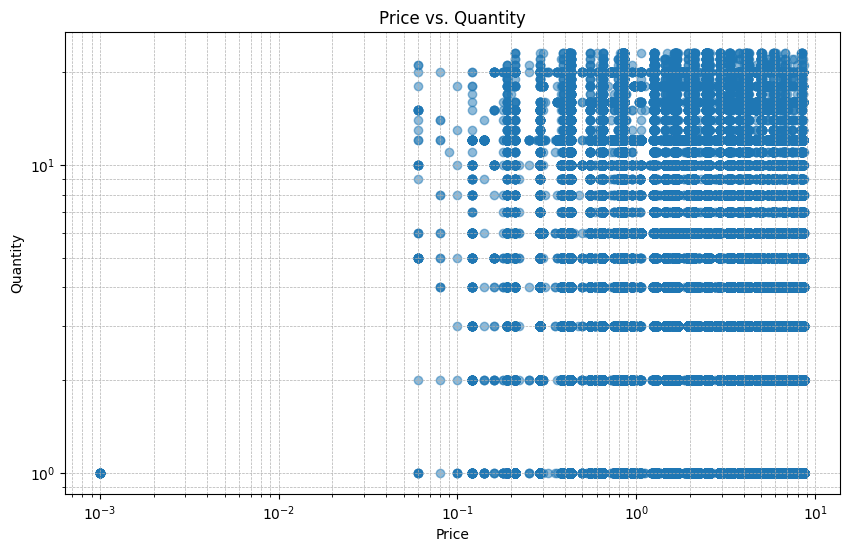

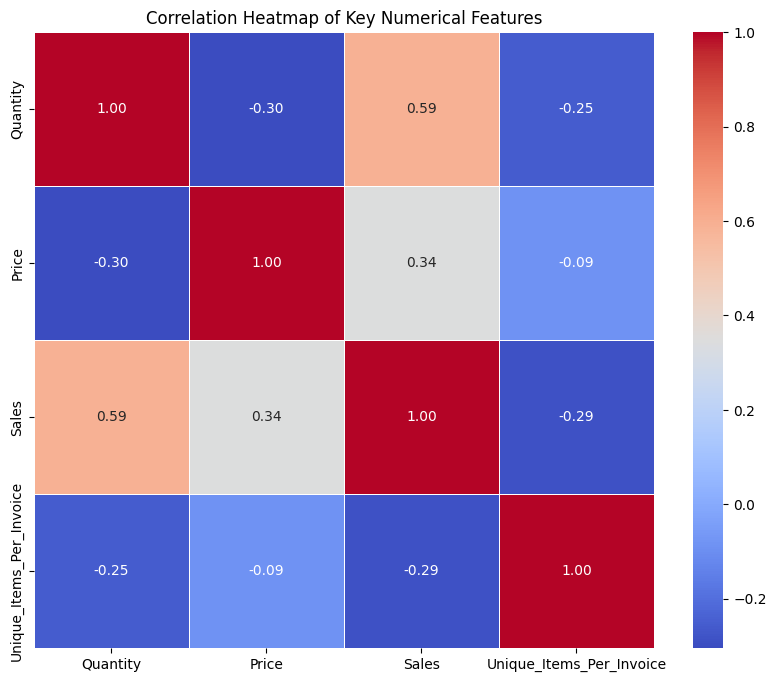

In [43]:
# --- 1. Correlation Coefficient and Scatter Plot ---

# Calculate the correlation coefficient
correlation = df_cleaned['Price'].corr(df_cleaned['Quantity'])
print(f"Correlation coefficient between Price and Quantity: {correlation:.4f}")

# Check for skewness to decide on log scale
skew_price = df_cleaned['Price'].skew()
skew_quantity = df_cleaned['Quantity'].skew()

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_cleaned['Price'], df_cleaned['Quantity'], alpha=0.5)

# Use a log scale if the data is highly skewed
if skew_price > 1 or skew_price < -1:
    ax.set_xscale('log')
if skew_quantity > 1 or skew_quantity < -1:
    ax.set_yscale('log')

ax.set_title('Price vs. Quantity')
ax.set_xlabel('Price')
ax.set_ylabel('Quantity')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# --- 2. Correlation Heatmap ---

# Select the numerical columns for the heatmap
numerical_cols = ['Quantity', 'Price', 'Sales', 'Unique_Items_Per_Invoice']

# Calculate the correlation matrix
correlation_matrix = df_cleaned[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()

Correlation coefficient between Quantity and Total_Price: 0.5891


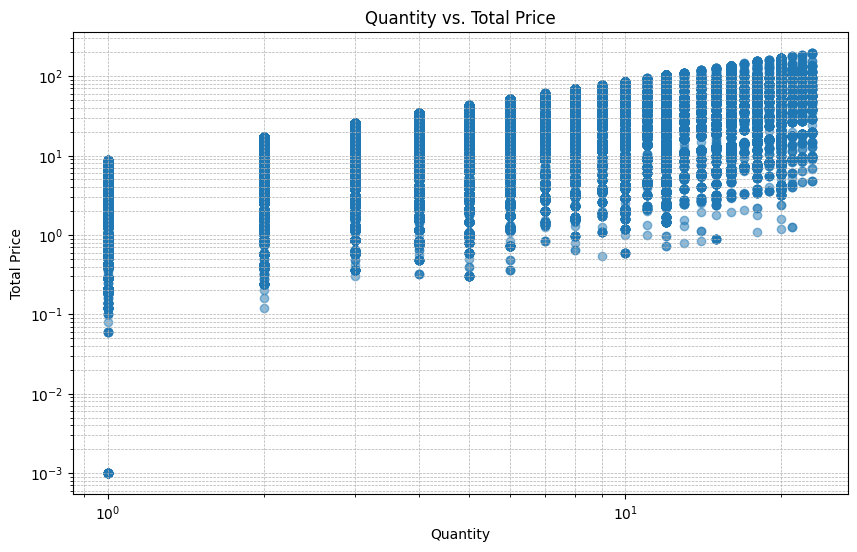

In [44]:
# --- 1. Correlation Coefficient and Scatter Plot ---

# Calculate the correlation coefficient
correlation = df_cleaned['Quantity'].corr(df_cleaned['Total_Price'])
print(f"Correlation coefficient between Quantity and Total_Price: {correlation:.4f}")

# Check for skewness to decide on log scale
skew_quantity = df_cleaned['Quantity'].skew()
skew_total_price = df_cleaned['Total_Price'].skew()

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_cleaned['Quantity'], df_cleaned['Total_Price'], alpha=0.5)

# Use a log scale if the data is highly skewed
if skew_quantity > 1 or skew_quantity < -1:
    ax.set_xscale('log')
if skew_total_price > 1 or skew_total_price < -1:
    ax.set_yscale('log')

ax.set_title('Quantity vs. Total Price')
ax.set_xlabel('Quantity')
ax.set_ylabel('Total Price')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()



Correlation coefficient between Unique_Items_Per_Invoice and Total_Price: -0.2872


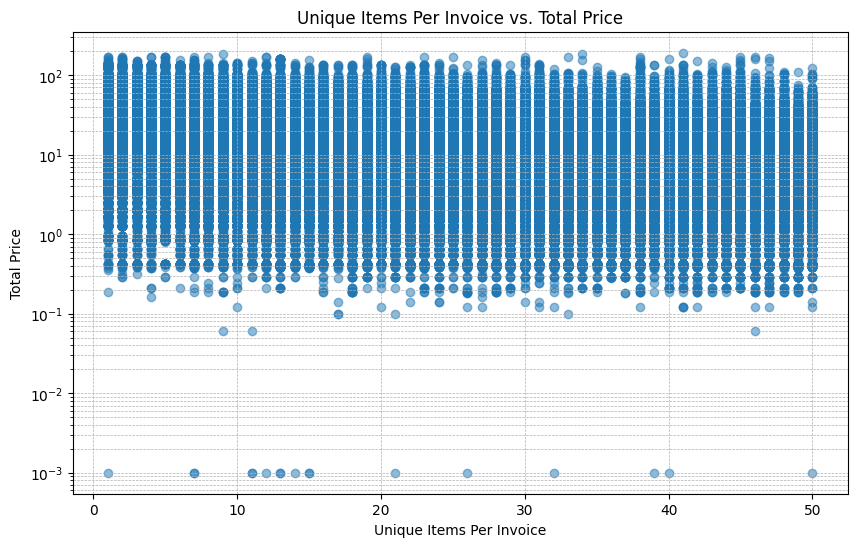

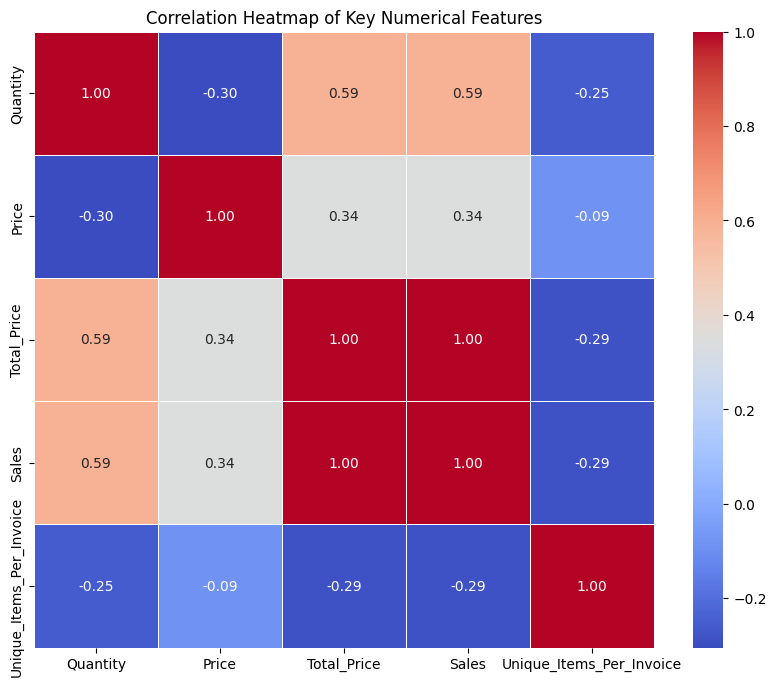

In [45]:
# --- 1. Correlation Coefficient and Scatter Plot ---

# Calculate the correlation coefficient
correlation = df_cleaned['Unique_Items_Per_Invoice'].corr(df_cleaned['Total_Price'])
print(f"Correlation coefficient between Unique_Items_Per_Invoice and Total_Price: {correlation:.4f}")

# Check for skewness to decide on log scale
skew_unique_items = df_cleaned['Unique_Items_Per_Invoice'].skew()
skew_total_price = df_cleaned['Total_Price'].skew()

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_cleaned['Unique_Items_Per_Invoice'], df_cleaned['Total_Price'], alpha=0.5)

# Use a log scale if the data is highly skewed
if skew_unique_items > 1 or skew_unique_items < -1:
    ax.set_xscale('log')
if skew_total_price > 1 or skew_total_price < -1:
    ax.set_yscale('log')

ax.set_title('Unique Items Per Invoice vs. Total Price')
ax.set_xlabel('Unique Items Per Invoice')
ax.set_ylabel('Total Price')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# --- 2. Correlation Heatmap ---

# Select the numerical columns for the heatmap
numerical_cols = ['Quantity', 'Price', 'Total_Price', 'Sales', 'Unique_Items_Per_Invoice']

# Calculate the correlation matrix
correlation_matrix = df_cleaned[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()

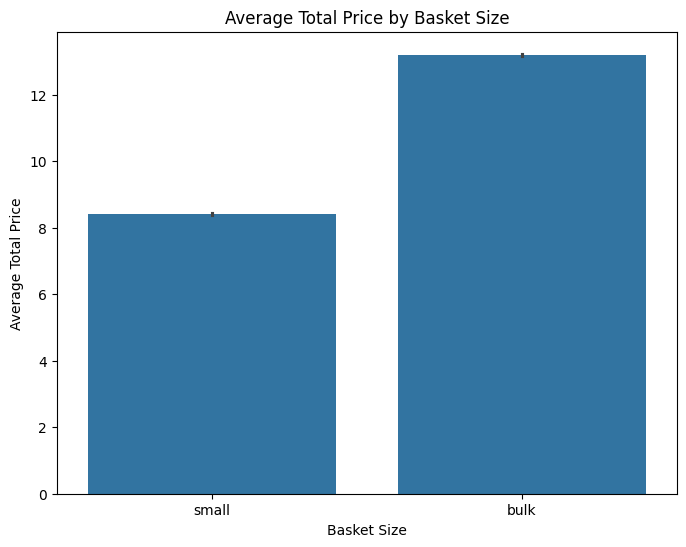

In [46]:
# --- 2. Bar Plot of Average Total_Price by Basket_Size ---
plt.figure(figsize=(8, 6))
sns.barplot(x='Basket_Size', y='Total_Price', data=df_cleaned, estimator=np.mean)
plt.title('Average Total Price by Basket Size')
plt.xlabel('Basket Size')
plt.ylabel('Average Total Price')
plt.show()

## Insights 
- Spending on bulk order is high

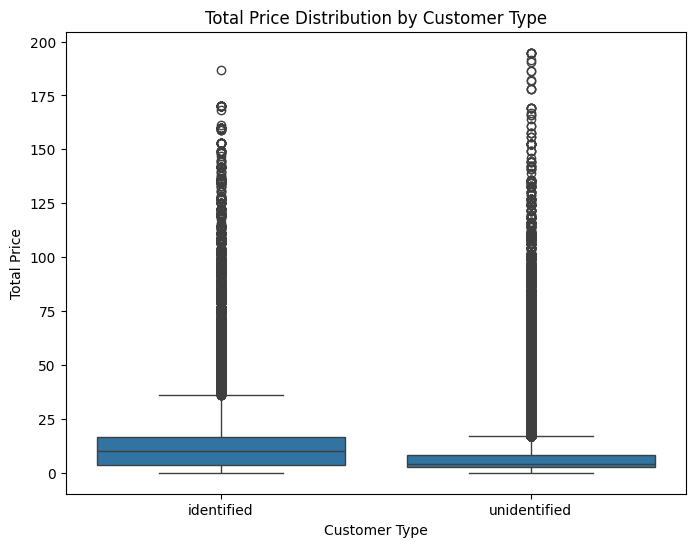

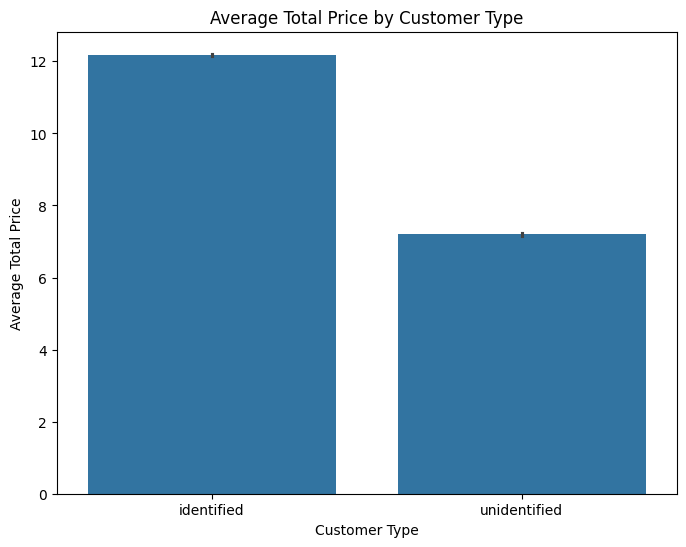

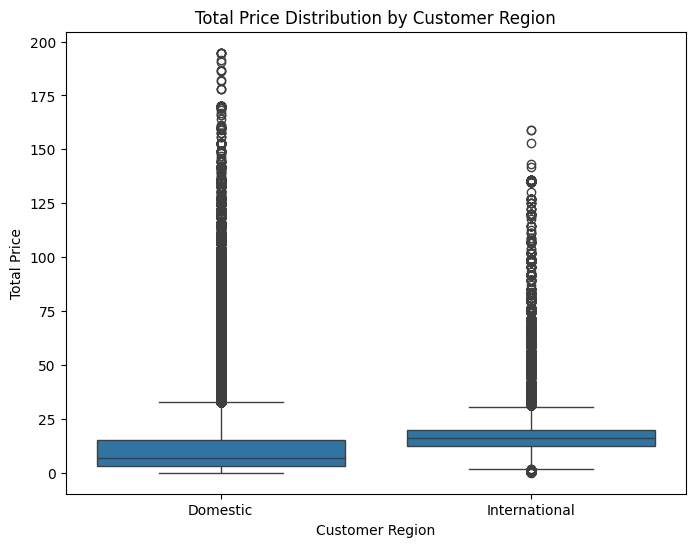

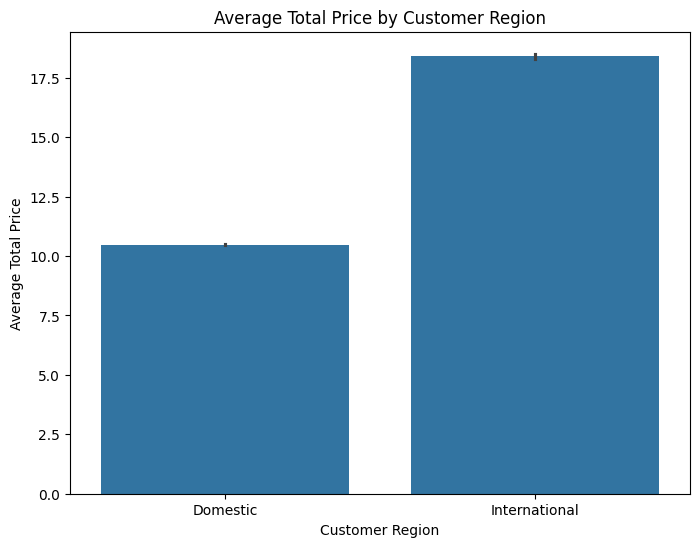

In [ ]:
# --- 1. Box Plot: Customer Type vs. Total Price ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer_Type', y='Total_Price', data=df_cleaned)
plt.title('Total Price Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Price')
plt.show()

# --- 2. Bar Plot: Customer Type vs. Total Price ---
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer_Type', y='Total_Price', data=df_cleaned, estimator=np.mean)
plt.title('Average Total Price by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Total Price')
plt.show()

# --- 3. Box Plot: Customer Region vs. Total Price ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer_Region', y='Total_Price', data=df_cleaned)
plt.title('Total Price Distribution by Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Total Price')
plt.show()

# --- 4. Bar Plot: Customer Region vs. Total Price ---
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer_Region', y='Total_Price', data=df_cleaned, estimator=np.mean)
plt.title('Average Total Price by Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Average Total Price')
plt.show()








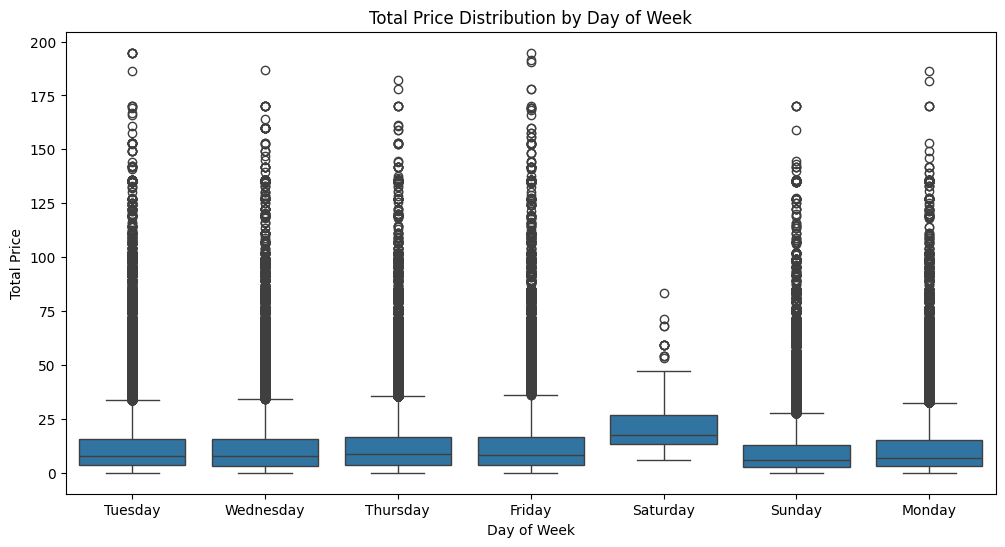

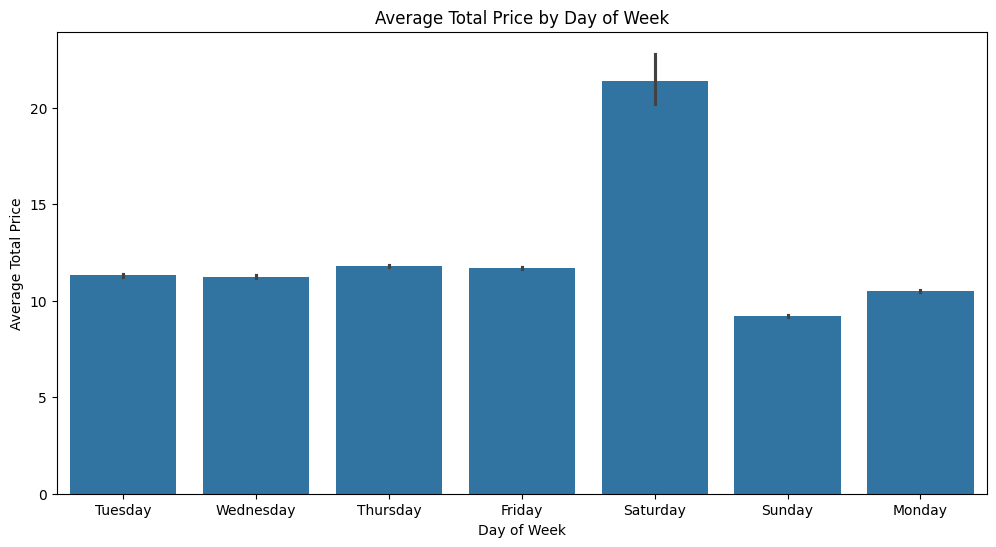

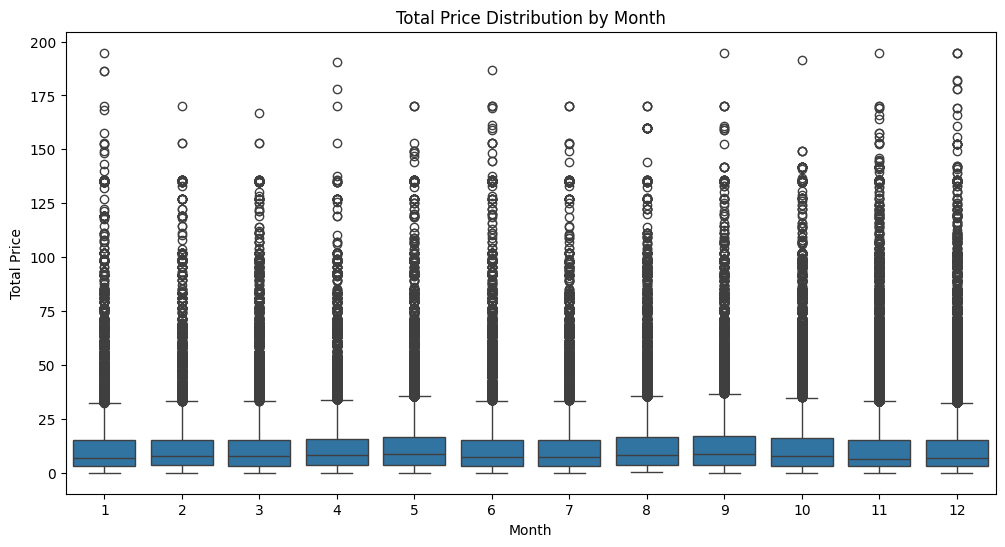

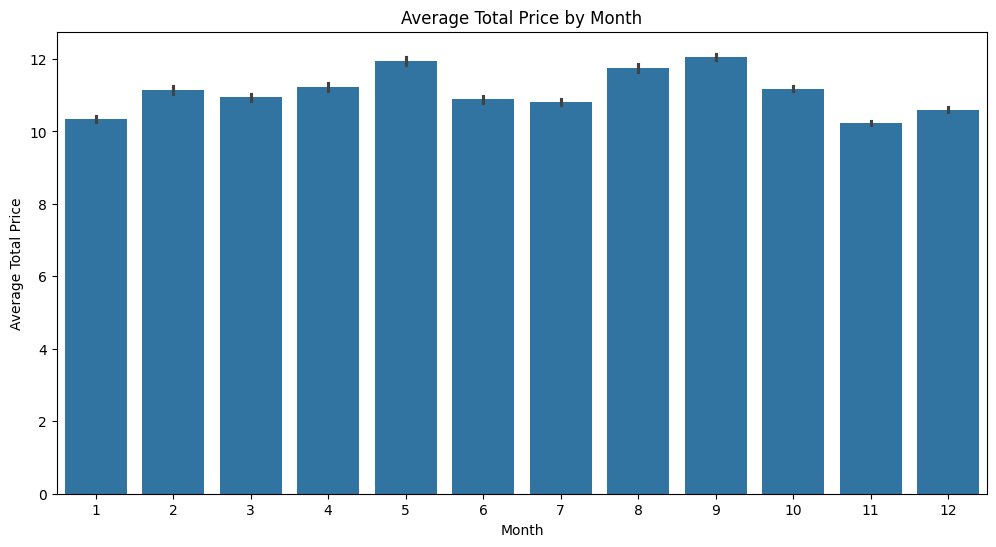

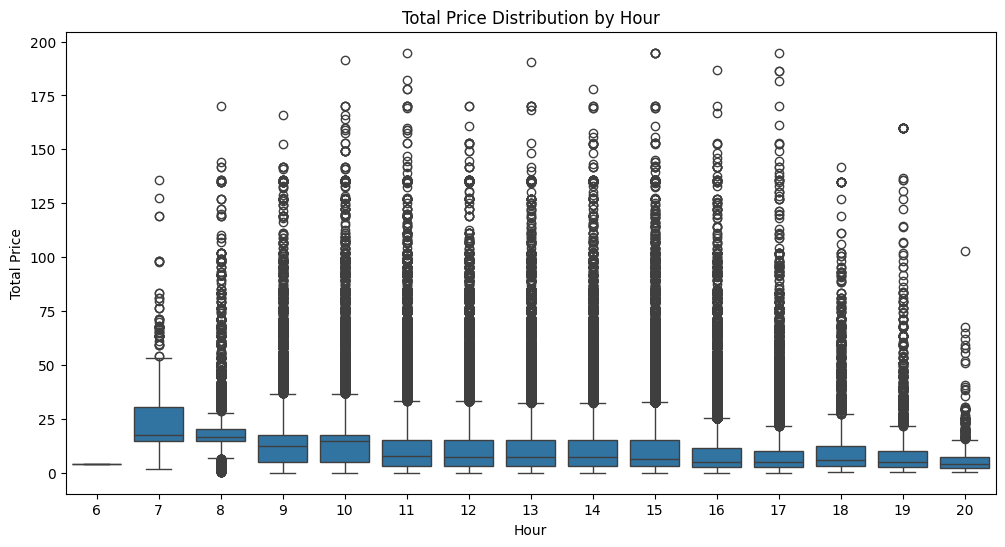

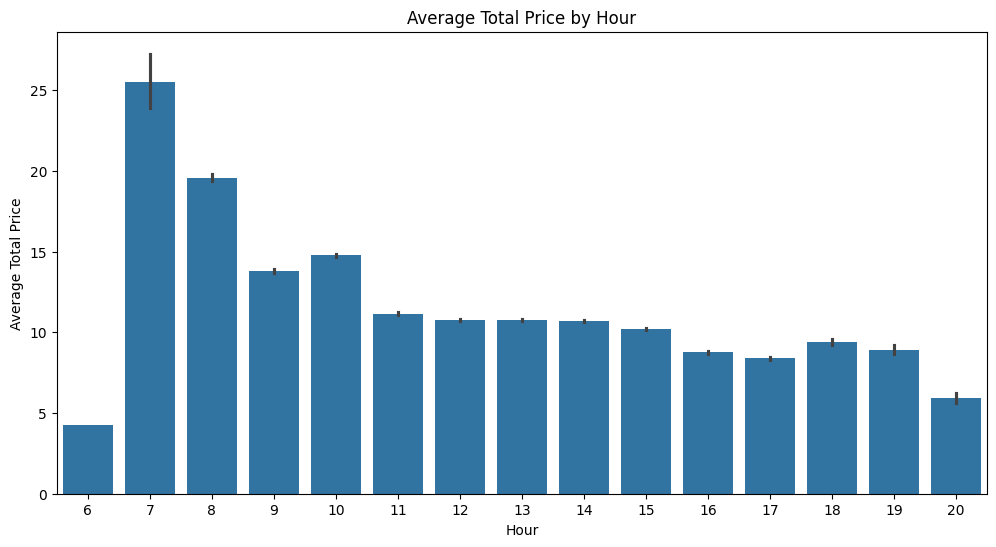

In [48]:
# --- 1. Weekday vs. Total Price ---
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weekday', y='Total_Price', data=df_cleaned)
plt.title('Total Price Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Weekday', y='Total_Price', data=df_cleaned, estimator=np.mean)
plt.title('Average Total Price by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Total Price')
plt.show()

# --- 2. Month vs. Total Price ---
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Total_Price', data=df_cleaned)
plt.title('Total Price Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Total_Price', data=df_cleaned, estimator=np.mean)
plt.title('Average Total Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Total Price')
plt.show()

# --- 3. Hour vs. Total Price ---
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Total_Price', data=df_cleaned)
plt.title('Total Price Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Total_Price', data=df_cleaned, estimator=np.mean)
plt.title('Average Total Price by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Total Price')
plt.show()

## Insights
1. Average total price is high for identified customers.
2. Average total price is high for international Customers.
3. Average total price is much high for Saturday. 
4. Average total price is high for 7th hour of the day. 

## Bivariate Analysis

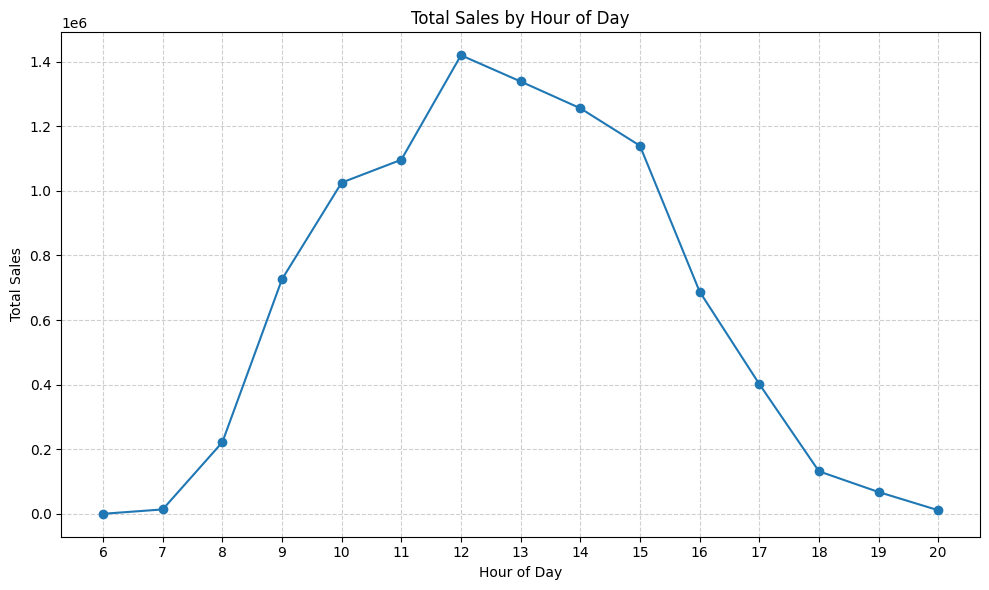

In [52]:
# Group by Hour and sum the Sales
sales_by_hour = df_cleaned.groupby('Hour')['Sales'].sum()

# Plot the line plot
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='line', marker='o')

plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(sales_by_hour.index)
plt.tight_layout()
plt.show()

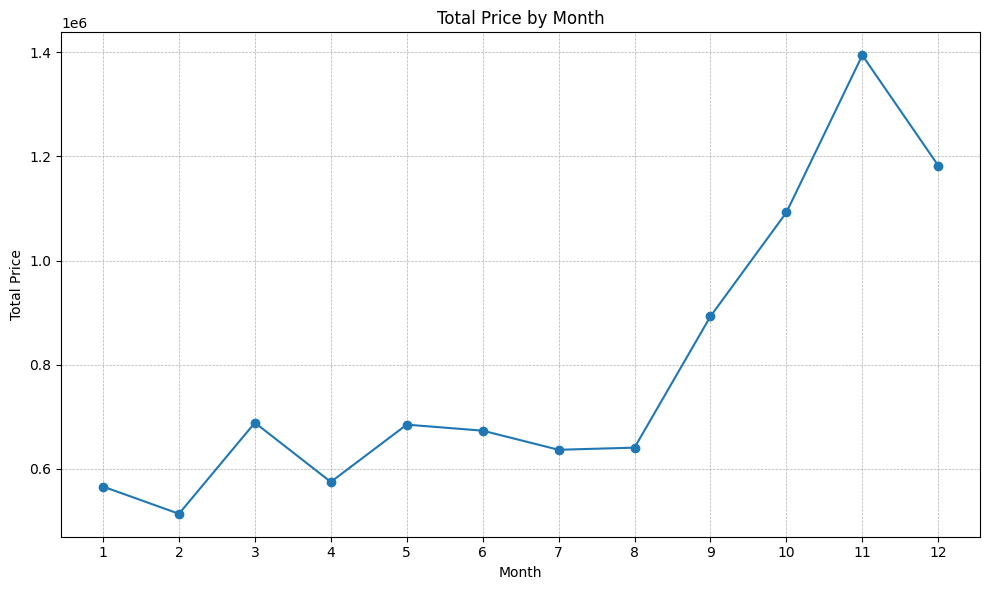

In [53]:
# Group by Month and sum the Total Price
sales_by_month = df_cleaned.groupby('Month')['Total_Price'].sum()

# Plot the line plot
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='line', marker='o')

plt.title('Total Price by Month')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.xticks(sales_by_month.index)
plt.tight_layout()
plt.show()

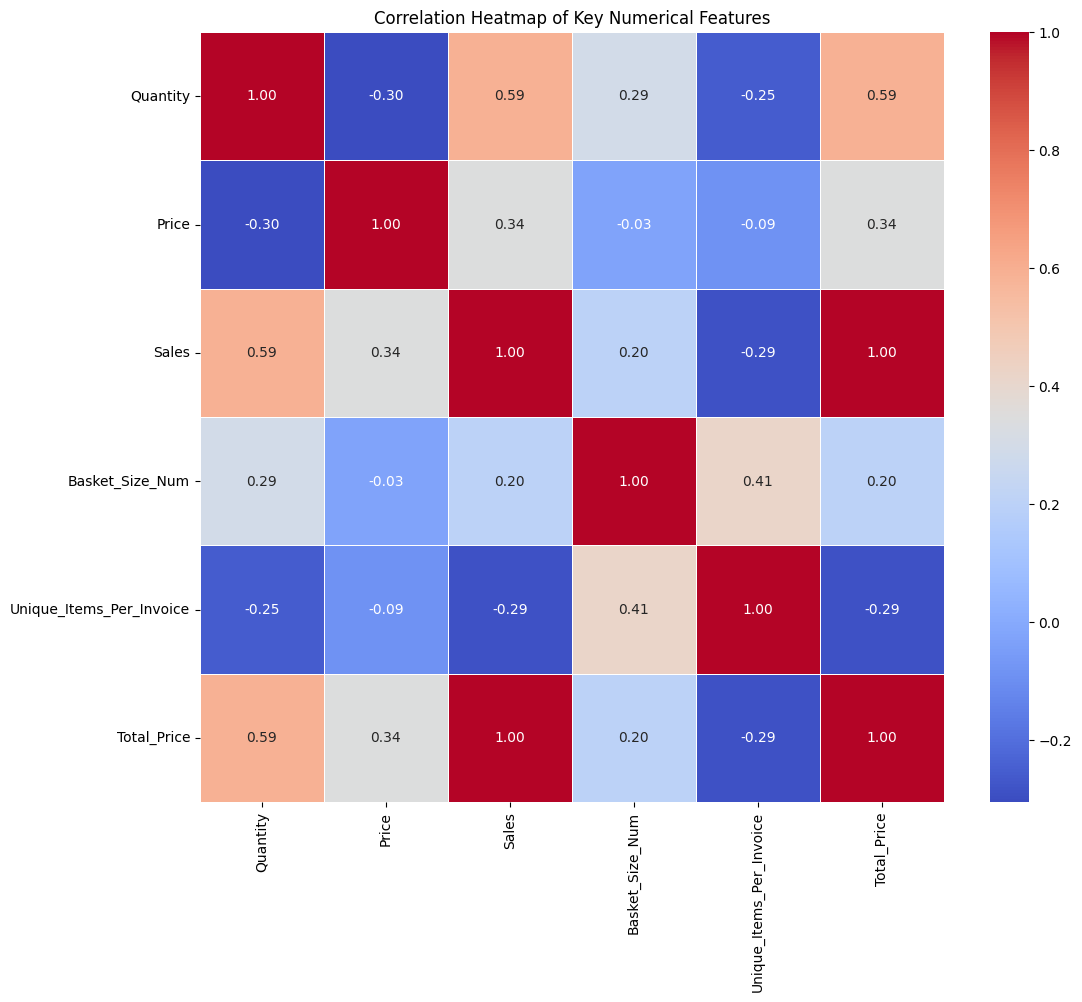

In [55]:
# --- 2. Correlation Heatmap Including 'Basket_Size' ---
# Step 1: Convert the categorical 'Basket_Size' column to a numerical one (0 or 1)
df_cleaned['Basket_Size_Num'] = np.where(df_cleaned['Basket_Size'] == 'bulk', 1, 0)

# Step 2: Select the numerical columns, including the new 'Basket_Size_Num'
numerical_cols = [
    'Quantity', 'Price', 'Sales', 'Basket_Size_Num',
    'Unique_Items_Per_Invoice', 'Total_Price'
]

# Step 3: Calculate the correlation matrix
correlation_matrix = df_cleaned[numerical_cols].corr()

# Step 4: Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()

## Business side:
1. Encourage identified customers (who already spend more) with promotions on bulk items.
2. Price-sensitive products (cheap ones bought in bulk) → discounts or bundles.
3. Saturday + 7th hour sales peak → optimize staffing/ads for that window.
4. International customers spend more → consider shipping incentives or region-specific bundles.

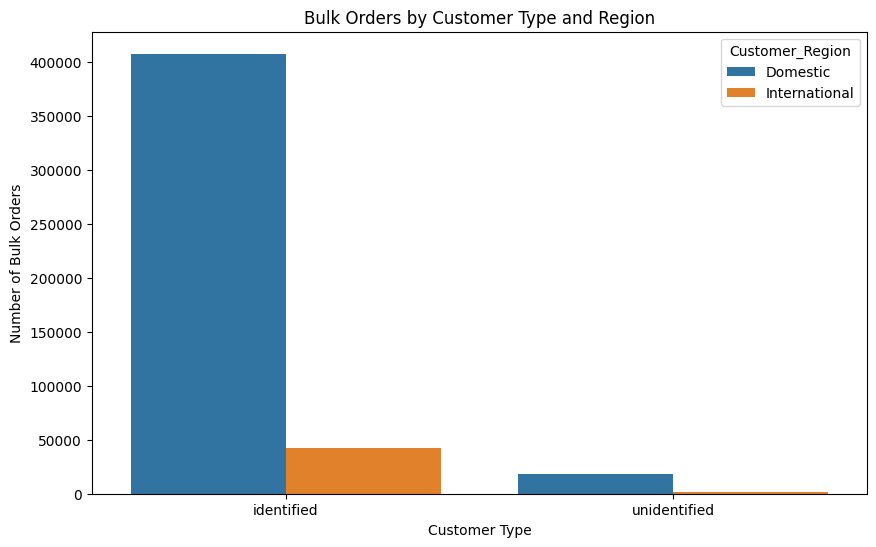

In [59]:
# Filter the DataFrame for only bulk orders
bulk_orders = df_cleaned[df_cleaned['Basket_Size'] == 'bulk']

# Group by both customer type and customer region
bulk_by_type_and_region = bulk_orders.groupby(['Customer_Type', 'Customer_Region']).size().reset_index(name='Count')

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Type', y='Count', hue='Customer_Region', data=bulk_by_type_and_region)
plt.title('Bulk Orders by Customer Type and Region')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bulk Orders')
plt.show()

## Multivariate analysis